## TP : Support Vector Machines 

Nous allons utiliser le dataset proposé par Andrew Ng dans ses cours. Il est composé de : 
* Deux fichiers ex6dataX, un contenant des données linéairement séparables, l'autre non. 
* spam.csv : SMS Spam Collection Dataset issu de kaggle, contenant deux colonnes : l'une est la classe (ham, spam), l'autre contient le texte du message. 

### Données linéairement séparables : 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
mat = loadmat("dataset/ex6data1.mat")
X = mat["X"]
y = mat["y"]

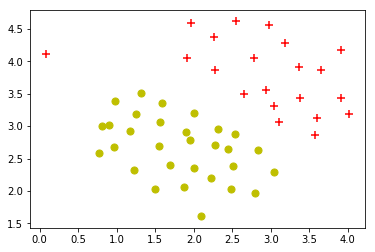

In [2]:
m,n = X.shape[0],X.shape[1]
pos,neg= (y==1).reshape(m,1), (y==0).reshape(m,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

Nous allons directement utiliser le modèle SVC de scikit-learn au lieu de programmer from scratch le modèle SVM étudié. 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [3]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear") # On spécifie que le kernel utilisé cette fois-ci est linéaire.
classifier.fit(X,np.ravel(y))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

(1.5, 5)

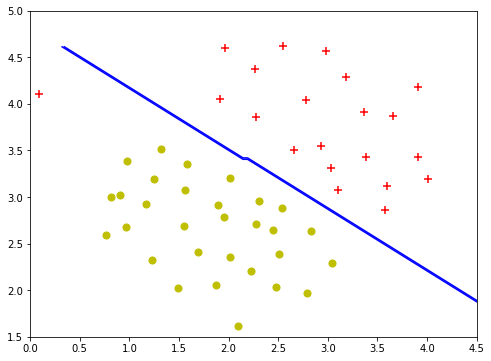

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

# plotting the decision boundary
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

(1.5, 5)

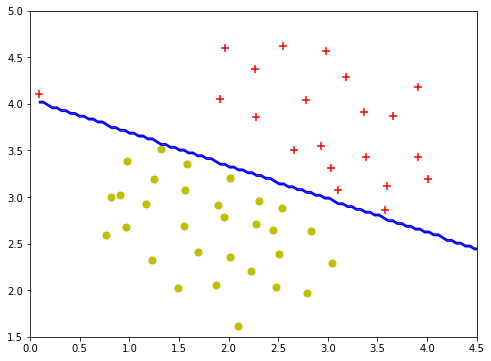

In [5]:
# TODO : Test avec C = 100
# Quel est la différence et pourquoi ?

# Answer:
classifier = SVC(C=100,kernel="linear")
classifier.fit(X,np.ravel(y))

plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

# plotting the decision boundary
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

# Resultat:
En changant le parametre C, on reduire la band limite entre les 2 classes qu'on veut separer (on aura un "overfit").

![](images/C.PNG)

### Données non linéaires 


(0.4, 1)

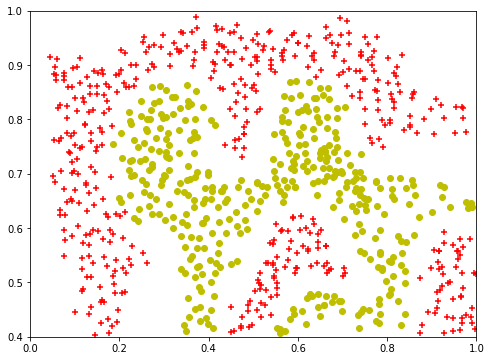

In [6]:
mat2 = loadmat("dataset/ex6data2.mat")
X2 = mat2["X"]
y2 = mat2["y"]
m2,n2 = X2.shape[0],X2.shape[1]
pos2,neg2= (y2==1).reshape(m2,1), (y2==0).reshape(m2,1)

plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")
plt.xlim(0,1)
plt.ylim(0.4,1)

##### Kernel RBF 
![](images/rbf.PNG)

In [7]:
classifier3 = SVC(kernel="rbf",gamma=30)
classifier3.fit(X2,y2.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

(0.4, 1)

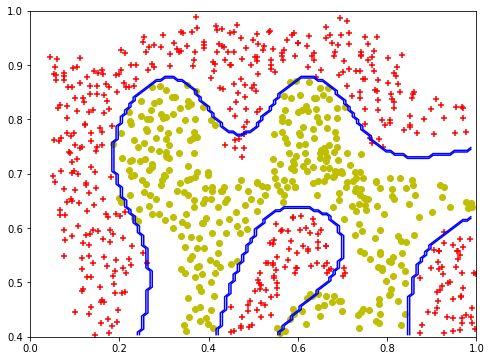

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")

# plotting the decision boundary
X_5,X_6 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
plt.contour(X_5,X_6,classifier3.predict(np.array([X_5.ravel(),X_6.ravel()]).T).reshape(X_5.shape),1,colors="b")
plt.xlim(0,1)
plt.ylim(0.4,1)

### Exemple réel : 
Application de détection de SPAM grâce aux SVMs. 


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [10]:
data = pd.read_csv('dataset/spam.csv', encoding='latin-1')
data.head(n=10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


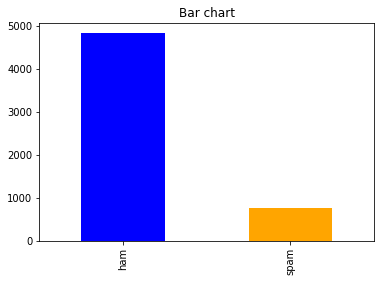

In [11]:
count_Class=pd.value_counts(data["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

In [12]:
count1 = Counter(" ".join(data[data['v1']=='ham']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})

count2 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

#Df contient les mots et leur nb

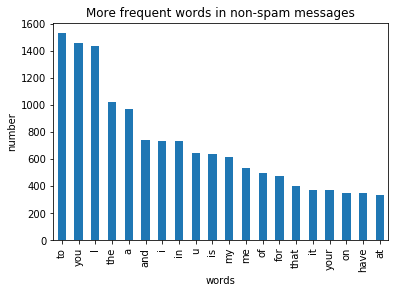

In [13]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

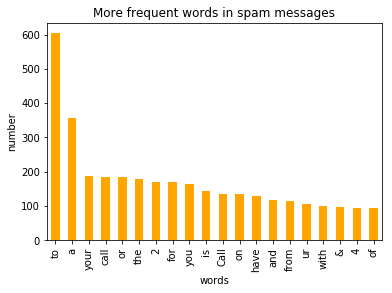

In [14]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [15]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["v2"])
np.shape(X)

(5572, 8404)

In [16]:
data["v1"]=data["v1"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['v1'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3733, 8404), (1839, 8404)]


In [17]:
list_C = np.arange(500, 2000, 100) #100000
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    
    count = count + 1 

In [18]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])

models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,0.994910,0.982599,0.873016,1.0
1,600.0,0.995982,0.982599,0.873016,1.0
2,700.0,0.996785,0.982599,0.873016,1.0
3,800.0,0.997053,0.983143,0.876984,1.0
4,900.0,0.997589,0.983143,0.876984,1.0
5,1000.0,0.998125,0.983143,0.876984,1.0
6,1100.0,0.998928,0.983143,0.876984,1.0
7,1200.0,0.999732,0.983143,0.876984,1.0
8,1300.0,1.000000,0.983143,0.876984,1.0
9,1400.0,1.000000,0.983143,0.876984,1.0


In [19]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      0.994910
Test Accuracy       0.982599
Test Recall         0.873016
Test Precision      1.000000
Name: 0, dtype: float64

In [20]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
svc = svm.SVC(C=list_C[best_index])
svc.fit(X_train, y_train)
models.iloc[best_index, :]

C                 800.000000
Train Accuracy      0.997053
Test Accuracy       0.983143
Test Recall         0.876984
Test Precision      1.000000
Name: 3, dtype: float64

In [21]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1587,0
Actual 1,31,221


In [32]:
# TODO : predict whether a text message is a spam or a ham 
text = ["XXXCarsClub: To win a car, click the link here >> http://wap.xxxcarsclub.com?n=QJKGIGHJJGCBL"]
text1 = f.transform(text)
text = ["Hello, call me when you back home."]
text2 = f.transform(text)

In [33]:
arr = svc.predict(text1)
print(arr)
arr = svc.predict(text2)
print(arr)

[1]
[0]
